<a href="https://colab.research.google.com/github/Rossember555/a/blob/main/working_example_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing with Twitter data:

* [Link to the twitter scraper that extracts data](https://github.com/taspinar/twitterscraper)
* [Cleaning twitter data with NLTK](https://medium.com/@SeoJaeDuk/basic-data-cleaning-engineering-session-twitter-sentiment-data-b9376a91109b)
* [Link to the sentiment analysis tool for spanish ](https://github.com/aylliote/senti-py)
* [Plotly custom configuration for iplot](https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory)
* [Comprehensive explanation of theory behind Word2Vec models](https://arxiv.org/pdf/1411.2738.pdf)

In [ ]:
# import main dependencies
import numpy as np
import pandas as pd
import datetime as dt
!pip install nltk
!pip install gensim
!pip install twitterscraper
!pip install spanish_sentiment_analysis
from twitterscraper import query_tweets
import nltk
nltk.download('punkt')
from nltk import tokenize
from gensim.models import Word2Vec

# custom function to allow full functionality of plotly iplot 
# in Google colab environment 

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

### Scrape twitter data
<hr/>

In [ ]:
# scrape tweets related with a given query word
keyword = '#JEP'
scraped_data = query_tweets(keyword, begindate = dt.date(2018,12,1), limit = 2000)

In [ ]:
# see example of tweet object:
obj = scraped_data[2]
print(obj.user)
print(obj.text)

xxxxxxxytr
#JEP Frente a la CPI (Corte Penal Internacional) ningún sindicado es inmune, es decir, no son válidos los fueros o blindajes presidenciales.  Si hay inoperancia de la justicia interna de un país, como en este caso, la Corte pondrá sin duda su lupa sobre las actuaciones de Uribe,


In [ ]:
# build pandas DataFrame
df = None
for i, obj in enumerate(scraped_data):
  temp = pd.DataFrame({'usuario': obj.user, 'texto': obj.text, 'timestamp': obj.timestamp}, index=[i])
  df = pd.concat([df, temp])
  
df.head()

texto           timestamp  \
0  #JEP Contrario a lo repetido por el senador Ur... 2018-12-05 21:52:19   
1  #JEP El proceso ha sido vigilado y  acompañado... 2018-12-05 21:41:57   
2  #JEP Frente a la CPI (Corte Penal Internaciona... 2018-12-05 21:35:15   
3  Getting some food prep done today! \n#cheapeat... 2018-12-05 21:03:37   
4  La @JEP_Colombia #JEP brazo desarmado de las @... 2018-12-05 20:01:23   

         usuario  
0     xxxxxxxytr  
1     xxxxxxxytr  
2     xxxxxxxytr  
3  JonPienkowski  
4     mafaldafox

### Build Word2Vec Embedding
<hr/>
*  Recommended tutorial with Gensim [here](http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.XJw8Z1NKjOQ)

In [ ]:
# tokenize texts -> build embedding Word2Vec
token_list = []
for obj in scraped_data:
  token_list.append(tokenize.word_tokenize(obj.text))

# train the Word2Vec Model
model = Word2Vec(token_list, min_count = 1, window = 4)
model.train(token_list, total_examples = len(token_list), epochs = 500)

(24239164, 34999500)

In [ ]:
# example of word vector
model.wv[keyword.replace('#','')]

array([ 1.964528  ,  1.052399  , -0.05214798, -0.8339489 ,  0.3823873 ,
       -3.4325688 , -1.8457029 ,  2.3210285 ,  1.5082954 ,  2.3321352 ,
       -2.9864566 ,  0.5362464 ,  0.77794564,  1.9784209 ,  2.2759297 ,
       -3.2158527 , -0.7966344 ,  1.1066754 ,  0.53212684, -2.7089128 ,
       -0.37091652, -2.696257  , -1.6397859 ,  0.1517407 , -1.169866  ,
       -0.44814938, -2.494991  , -3.4407685 ,  0.24547401,  1.1363395 ,
       -2.3945394 , -1.9803742 , -0.41944116,  2.5849786 , -1.4330248 ,
        1.5851445 , -2.935844  , -1.5583799 ,  1.3253213 ,  2.3759294 ,
        2.007637  , -2.688828  , -0.10593035,  0.87702304,  1.44592   ,
       -0.92355543,  1.4593047 ,  0.55725014, -3.237729  , -1.7563193 ,
        4.06791   ,  0.60642636,  0.39648408,  0.44899386,  1.3044969 ,
        0.32596433, -1.2102902 ,  0.33059594, -1.862987  , -4.8550415 ,
        4.7534127 ,  0.73989004,  2.9592419 , -1.6156818 , -0.4752095 ,
       -0.29358304, -0.43032098,  1.2157558 , -3.81417   , -1.16

In [ ]:
# find similar words by vector distances among words in vocabulary
model.similar_by_word(keyword.replace('#',''))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('#', 0.5912903547286987),
 ('de', 0.5752558708190918),
 ('a', 0.5601145029067993),
 ('la', 0.5544924139976501),
 (',', 0.5498114228248596),
 ('que', 0.542609691619873),
 ('Jep', 0.5393905639648438),
 ('@', 0.5208211541175842),
 ('el', 0.5158694982528687),
 ('.', 0.5006927251815796)]

### Build word dictionary with frequency countings
<hr/>

In [ ]:
word_dic = {}
for token in token_list:
  for word in token:
    if word in word_dic.keys():
      word_dic[word] += 1
    else:
      word_dic[word] = 1
      
wd_df = pd.DataFrame({'word': list(word_dic.keys()), 'count': list(word_dic.values())})
wd_df = wd_df.sort_values(by = 'count', ascending=False)
wd_df.head()

count word
0    4838    #
12   2719   de
29   2670   la
10   2032    ,
1    1988  JEP

### Build array of keyedVectors from corpora
<hr/>

In [ ]:
vec_arr = []
for word in wd_df['word']:
  vec_arr.append(model.wv[word])
  
vec_arr[:2]

[array([ 1.2467951e+00,  5.4632020e-01, -6.1858153e-01,  1.3642541e-01,
        -5.9992641e-01, -5.3575414e-01, -2.2378781e+00,  3.7385836e-01,
        -3.7194252e-01,  9.8491102e-01,  1.4233978e-01,  1.0866712e+00,
        -1.8326401e+00,  7.9254264e-01,  7.9620190e-02, -2.7537291e+00,
         2.2327630e-01,  7.1115620e-02, -1.2187042e+00, -7.1015555e-01,
        -1.2178829e+00, -1.3680077e+00,  2.5005570e-02,  5.6094682e-01,
         6.6532053e-02, -2.4416101e+00, -2.6770022e+00, -2.5534260e+00,
         6.2229127e-01,  3.1770632e-01, -1.1258137e+00, -1.5997464e-03,
         9.2199308e-01,  1.2314283e+00, -2.1447241e-01, -2.7669303e+00,
        -2.5287333e+00, -1.5498248e+00, -4.3425074e-01,  2.8122225e+00,
         1.4521552e+00, -2.2940142e+00,  8.1772149e-01, -4.5501187e-01,
         7.0018369e-01, -3.4909256e+00, -1.8240720e+00, -3.2176283e-01,
        -9.5387292e-01, -9.4851851e-01,  3.1643996e+00,  1.8999115e+00,
        -3.1453341e-01,  6.5362930e-01,  1.2618601e+00,  1.03046

### Apply dimensionality reduction algorithm (TSNE)
<hr/>

In [ ]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state = 0)
Y0 = tsne.fit_transform(vec_arr)

CPU times: user 3min 44s, sys: 503 ms, total: 3min 44s
Wall time: 3min 44s


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go

x_coords = Y0[:,0]
y_coords = Y0[:,1]

trace = go.Scatter(x = x_coords, y = y_coords, mode = 'markers', 
                   text = list(wd_df['word'].values))

py.plot([trace], filename = 'scatter_plot.html')
configure_plotly_browser_state()
py.init_notebook_mode(connected=True)
py.iplot([trace])

### Vectorization of sentences
<hr/>

In [ ]:
from nltk.cluster import KMeansClusterer
from sklearn import cluster
from sklearn import metrics

def sent_vectorizer(sent, model):
  sent_vec = []
  numw = 0
  for word in sent:
    try:
      if numw == 0:
        sent_vec = model.wv[word]
      else:
        sent_vec = np.add(sent_vec, model.wv[word])
      numw += 1
    except:
      pass
  return np.asarray(sent_vec)/ numw

token_list_vec = [] #list of vectors for sentences 
for token in token_list:
  res = list(sent_vectorizer(token, model))
  if len(res) == 100: 
    token_list_vec.append(res)
    
sent_vectorizer(token_list[1], model)

array([ 5.3572655e-01, -4.6036151e-01, -1.0913932e-01,  2.9282907e-01,
       -7.6355886e-01, -2.4104141e-01, -4.3315533e-01,  7.2579288e-01,
       -7.3402655e-01,  6.5966803e-01, -8.2671118e-01,  3.7942120e-01,
       -8.7194902e-01,  1.2630982e+00,  1.4280829e-01, -2.9776624e-01,
       -2.6951313e-02, -2.6172018e-01, -7.2807235e-01,  2.4629344e-01,
       -1.4891812e+00, -3.1224298e-01,  1.7475471e-01,  1.1375917e+00,
       -7.1978801e-01, -2.7744651e-01, -1.0078764e+00, -8.1213742e-01,
       -8.0517285e-02,  8.2645379e-02, -5.8185899e-01,  6.0830212e-01,
        4.1863602e-01,  9.7400554e-02, -4.1856545e-01, -4.1166851e-01,
       -4.9062994e-01, -1.5930321e+00,  6.4777499e-01,  1.9652735e-01,
        2.3341285e-01, -1.5699809e+00,  8.1177938e-01, -8.2006842e-01,
       -1.2983589e-01, -9.5564038e-01,  6.7741370e-01,  2.5698131e-01,
       -1.4028707e+00, -1.0757614e+00,  2.1861968e+00,  8.6933684e-01,
        1.3845262e-01, -1.3677260e-02, -1.5991208e-01,  6.9723123e-01,
      

### Applying Elbow method to determine optimal number of clusters
<hr/>

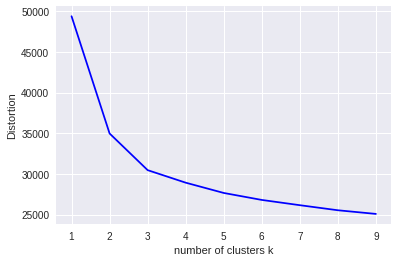

In [ ]:
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
  kmeanModel = cluster.KMeans(n_clusters = k)
  kmeanModel.fit(token_list_vec)
  distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('number of clusters k')
plt.ylabel('Distortion')
plt.show()

### Run KMeans with optimal number of clusters
<hr/>

In [ ]:
NUM_CLUSTERS = 3
kmeans = cluster.KMeans(n_clusters = NUM_CLUSTERS)
kmeans.fit(token_list_vec)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

### Apply dimensionality reduction algorithm (TSNE)
<hr/>

In [ ]:
km_tsne = TSNE(n_components=2, random_state = 0)
np.set_printoptions(suppress = True)
labels = kmeans.labels_

kmY = km_tsne.fit_transform(token_list_vec)
df['tsne_x_coord'] = kmY[:, 0]
df['tsne_y_coord'] = kmY[:, 1]
df['cluster_label'] = labels
df.head()

texto           timestamp  \
0  #JEP Contrario a lo repetido por el senador Ur... 2018-12-05 21:52:19   
1  #JEP El proceso ha sido vigilado y  acompañado... 2018-12-05 21:41:57   
2  #JEP Frente a la CPI (Corte Penal Internaciona... 2018-12-05 21:35:15   
3  Getting some food prep done today! \n#cheapeat... 2018-12-05 21:03:37   
4  La @JEP_Colombia #JEP brazo desarmado de las @... 2018-12-05 20:01:23   

         usuario  tsne_x_coord  tsne_y_coord  cluster_label  
0     xxxxxxxytr    -27.495586    -29.448448              1  
1     xxxxxxxytr    -31.585562     13.526688              1  
2     xxxxxxxytr    -17.580238    -23.443550              1  
3  JonPienkowski     38.106853     21.132875              2  
4     mafaldafox     13.928501    -23.639221              1

In [ ]:
# Plotting clusters with Plotly

trace_c1 = go.Scatter(x = [], y = [], mode = 'markers', text = [], 
                      marker = dict(color = 'red'))
trace_c2 = go.Scatter(x = [], y = [], mode = 'markers', text = [], 
                      marker = dict(color = 'blue'))
trace_c3 = go.Scatter(x = [], y = [], mode = 'markers', text = [], 
                      marker = dict(color = 'green'))

for i in range(len(df)):
  if df.iloc[i]['cluster_label'] == 0:
    trace_c1.x = list(trace_c1.x) + [df.iloc[i]['tsne_x_coord']]
    trace_c1.y = list(trace_c1.y) + [df.iloc[i]['tsne_y_coord']]
    trace_c1.text = list(trace_c1.text) + [df.iloc[i]['texto']]
  if df.iloc[i]['cluster_label'] == 1:
    trace_c2.x = list(trace_c2.x) + [df.iloc[i]['tsne_x_coord']]
    trace_c2.y = list(trace_c2.y) + [df.iloc[i]['tsne_y_coord']]
    trace_c2.text = list(trace_c2.text) + [df.iloc[i]['texto']]
  if df.iloc[i]['cluster_label'] == 2:
    trace_c3.x = list(trace_c3.x) + [df.iloc[i]['tsne_x_coord']]
    trace_c3.y = list(trace_c3.y) + [df.iloc[i]['tsne_y_coord']]
    trace_c3.text = list(trace_c3.text) + [df.iloc[i]['texto']]


#py.plot([trace], filename = 'scatter_plot.html')
configure_plotly_browser_state()
py.init_notebook_mode(connected=True)
py.iplot([trace_c1, trace_c2, trace_c3])